In [12]:
import numpy as np

np.random.seed(0)
x = np.linspace(0, 2, 40)
epsilon = np.random.normal(0, 0.3, len(x))
y = 1.5 + 3*np.exp(0.5*x) - 2*x**2 + 0.5*x**3 + epsilon

def f(x, theta):
    b0, a, b, c, d = theta
    return b0 + a*np.exp(b*x) + c*x**2 + d*x**3

def residuals(theta):
    return y - f(x, theta)

def jacobian(theta):
    b0, a, b, c, d = theta
    ebx = np.exp(b*x)

    # derivatives of f
    df_db0 = np.ones_like(x)
    df_da  = ebx
    df_db  = a * x * ebx
    df_dc  = x**2
    df_dd  = x**3

    # Jacobian of r = y - f: J = -df/dtheta
    J = np.column_stack([
        -df_db0,
        -df_da,
        -df_db,
        -df_dc,
        -df_dd
    ])
    return J

In [13]:
theta0 = np.array([1.0, 1.0, 0.1, 0.0, 0.0])
tol = 1e-6
max_iter = 100

In [14]:
r = residuals(theta0)
J = jacobian(theta0)

S = 0.5 * np.sum(r**2)

A = J.T @ J
b_vec = J.T @ r
delta_theta = np.linalg.solve(A, b_vec)

In [15]:
print(A)

[[ 40.          44.28433384  45.83509013  54.01709402  82.05128205]
 [ 44.28433384  49.19924073  52.63775256  62.92597797  96.53454551]
 [ 45.83509013  52.63775256  73.41312335  96.53454551 157.43823942]
 [ 54.01709402  62.92597797  96.53454551 132.93674315 224.34183539]
 [ 82.05128205  96.53454551 157.43823942 224.34183539 389.39176159]]


In [16]:
print(b_vec)

[-119.08504001 -131.99825028 -138.26846657 -164.75317491 -253.3197046 ]


In [17]:
print(delta_theta)

[-5.43925736e+03  5.43633096e+03 -5.44019307e+02  2.78824620e+01
  1.65699665e+00]


In [18]:
theta1 = theta0 + delta_theta
r = residuals(theta1)
J = jacobian(theta1)

S = 0.5 * np.sum(r**2)

A = J.T @ J
b_vec = J.T @ r
delta_theta = np.linalg.solve(A, b_vec)

In [19]:
print(theta1)
print(J)

[-5.43825736e+03  5.43733096e+03 -5.43919307e+02  2.78824620e+01
  1.65699665e+00]
[[-1.00000000e+000 -1.00000000e+000 -0.00000000e+000 -0.00000000e+000
  -0.00000000e+000]
 [-1.00000000e+000 -7.69298158e-013 -2.14509164e-010 -2.62984878e-003
  -1.34864040e-004]
 [-1.00000000e+000 -5.91819656e-025 -3.30043009e-022 -1.05193951e-002
  -1.07891232e-003]
 [-1.00000000e+000 -4.55285771e-037 -3.80852218e-034 -2.36686391e-002
  -3.64132909e-003]
 [-1.00000000e+000 -3.50250505e-049 -3.90651880e-046 -4.20775805e-002
  -8.63129857e-003]
 [-1.00000000e+000 -2.69447068e-061 -3.75659715e-058 -6.57462196e-002
  -1.68580050e-002]
 [-1.00000000e+000 -2.07285133e-073 -3.46793192e-070 -9.46745562e-002
  -2.91306327e-002]
 [-1.00000000e+000 -1.59464071e-085 -3.11251924e-082 -1.28862590e-001
  -4.62583658e-002]
 [-1.00000000e+000 -1.22675416e-097 -2.73652037e-094 -1.68310322e-001
  -6.90503886e-002]
 [-1.00000000e+000 -9.43739718e-110 -2.36835009e-106 -2.13017751e-001
  -9.83158853e-002]
 [-1.00000000e+00

In [20]:
print(A)

[[4.00000000e+01 1.00000000e+00 2.14509164e-10 5.40170940e+01
  8.20512821e+01]
 [1.00000000e+00 1.00000000e+00 1.65021504e-22 2.02313783e-15
  1.03750658e-16]
 [2.14509164e-10 1.65021504e-22 4.60141813e-20 5.64126663e-13
  2.89295725e-14]
 [5.40170940e+01 2.02313783e-15 5.64126663e-13 1.32936743e+02
  2.24341835e+02]
 [8.20512821e+01 1.03750658e-16 2.89295725e-14 2.24341835e+02
  3.89391762e+02]]


In [21]:
print(b_vec)

[-2.10654245e+05 -5.95561652e+00 -1.16754690e-06 -2.89962218e+05
 -4.39747470e+05]


In [22]:
print(delta_theta)

[-5.44333625e+03  5.43738063e+03  1.79552020e+09  2.82604271e+01
  1.40026359e+00]


In [23]:
theta2 = theta1 + delta_theta
r = residuals(theta2)
J = jacobian(theta2)

S = 0.5 * np.sum(r**2)

A = J.T @ J
b_vec = J.T @ r
delta_theta = np.linalg.solve(A, b_vec)

/var/folders/39/mb5cwg0x4h18n1y377g5rs9c0000gn/T/ipykernel_61785/789033450.py:10: RuntimeWarning: overflow encountered in exp
  return b0 + a*np.exp(b*x) + c*x**2 + d*x**3
/var/folders/39/mb5cwg0x4h18n1y377g5rs9c0000gn/T/ipykernel_61785/789033450.py:17: RuntimeWarning: overflow encountered in exp
  ebx = np.exp(b*x)


In [24]:
print(theta2)

[-1.08815936e+04  1.08747116e+04  1.79551965e+09  5.61428892e+01
  3.05726024e+00]


In [25]:
print(A)

[[ 40.                  inf          inf  54.01709402  82.05128205]
 [         inf          inf          inf          inf          inf]
 [         inf          inf          inf          inf          inf]
 [ 54.01709402          inf          inf 132.93674315 224.34183539]
 [ 82.05128205          inf          inf 224.34183539 389.39176159]]


In [26]:
print(b_vec)

[inf inf inf inf inf]


In [27]:
print(delta_theta)

[nan nan nan nan nan]


In [28]:
print(theta0)
print(theta1)
print(theta2)

[1.  1.  0.1 0.  0. ]
[-5.43825736e+03  5.43733096e+03 -5.43919307e+02  2.78824620e+01
  1.65699665e+00]
[-1.08815936e+04  1.08747116e+04  1.79551965e+09  5.61428892e+01
  3.05726024e+00]


In [31]:
import pandas as pd

df = pd.DataFrame(
    [theta0, theta1, theta2],
    index=["Iter 0", "Iter 1", "Iter 2"],
    columns=["b0", "a", "b", "c", "d"]
)
print(df)

                  b0             a             b          c         d
Iter 0      1.000000      1.000000  1.000000e-01   0.000000  0.000000
Iter 1  -5438.257359   5437.330958 -5.439193e+02  27.882462  1.656997
Iter 2 -10881.593606  10874.711589  1.795520e+09  56.142889  3.057260


In [36]:
import numpy as np

np.set_printoptions(precision=6, suppress=True)

# ==========================
# 1. Data
# ==========================
x = np.array([
    0, 0.051282051, 0.10256410256410256, 0.15384615384615385, 0.20512820512820512,
    0.2564102564102564, 0.3076923076923077, 0.358974359, 0.41025641025641024, 0.4615384615384615,
    0.5128205128205128, 0.5641025641025641, 0.6153846153846154, 0.6666666666666666, 0.717948718,
    0.7692307692307692, 0.8205128205128205, 0.8717948717948718, 0.923076923, 0.9743589743589743,
    1.0256410256410255, 1.0769230769230769, 1.1282051282051282, 1.1794871794871795, 1.2307692307692308,
    1.282051282051282, 1.3333333333333333, 1.3846153846153846, 1.435897435897436, 1.4871794871794872,
    1.5384615384615383, 1.5897435897435896, 1.641025641025641, 1.6923076923076923, 1.7435897435897436,
    1.7948717948717947, 1.846153846153846, 1.8974358974358974, 1.9487179487179487, 2
])
y = np.array([
    5.029215704, 4.69277265, 4.930981294, 5.366628344, 5.304452863, 4.494111696,
    5.109177051, 4.809807528, 4.849986245, 5.025007599, 4.961523694, 5.367150796,
    5.168284527, 4.982599039, 5.08287197, 5.051400995, 5.399555294, 4.888743998,
    5.042580532, 4.690692896, 4.17966459, 5.141153534, 5.205261885, 4.72599361,
    5.634625262, 4.525285589, 4.986559308, 4.931754954, 5.467168501, 5.472420233,
    5.107737561, 5.210218041, 4.872339886, 4.593251394, 5.139360784, 5.354836578,
    5.749697008, 5.823012412, 5.437333342, 5.56415466
])

# ==========================
# 2. Model and helpers
# ==========================
def f(x, theta):
    """
    Model: f(x; theta) = b0 + a * exp(b * x) + c * x^2 + d * x^3
    theta = [b0, a, b, c, d]
    """
    b0, a, b, c, d = theta
    return b0 + a * np.exp(b * x) + c * x**2 + d * x**3

def residuals(theta):
    """
    Residuals: r_i(theta) = y_i - f(x_i; theta)
    """
    return y - f(x, theta)

def S(theta):
    """
    Sum-of-squares objective: S(theta) = 0.5 * sum_i r_i^2
    """
    r = residuals(theta)
    return 0.5 * np.sum(r**2)

# ==========================
# 3. Gradient for GD (from HW)
# ==========================
def grad_S(theta):
    """
    Gradient of S(theta) with respect to [b0, a, b, c, d]
    Using:
      S = 0.5 * sum r_i^2,  r_i = y_i - f_i
      ∂S/∂θ_j = - sum_i r_i * ∂f_i/∂θ_j
    """
    b0, a, b, c, d = theta
    y_hat = f(x, theta)
    r = y - y_hat
    ebx = np.exp(b * x)

    df_db0 = np.ones_like(x)
    df_da  = ebx
    df_db  = a * x * ebx
    df_dc  = x**2
    df_dd  = x**3

    dS_db0 = -np.sum(r * df_db0)
    dS_da  = -np.sum(r * df_da)
    dS_db  = -np.sum(r * df_db)
    dS_dc  = -np.sum(r * df_dc)
    dS_dd  = -np.sum(r * df_dd)

    return np.array([dS_db0, dS_da, dS_db, dS_dc, dS_dd])

# ==========================
# 4. Jacobian of residuals for Gauss–Newton (as in HW)
# ==========================
def jacobian_residuals(theta):
    """
    J(theta): Jacobian of residuals r w.r.t. parameters, shape (n,5).
    From HW: r_i = y_i - f(x_i; theta)
      ∂r_i/∂b0 = -1
      ∂r_i/∂a  = -exp(b x_i)
      ∂r_i/∂b  = -a x_i exp(b x_i)
      ∂r_i/∂c  = -x_i^2
      ∂r_i/∂d  = -x_i^3
    """
    b0, a, b, c, d = theta
    ebx = np.exp(b * x)

    dr_db0 = -np.ones_like(x)
    dr_da  = -ebx
    dr_db  = -(a * x * ebx)
    dr_dc  = -x**2
    dr_dd  = -x**3

    return np.column_stack([dr_db0, dr_da, dr_db, dr_dc, dr_dd])

# ==========================
# 5. Gradient Descent
# ==========================
def gradient_descent(theta0, alpha=1e-4, max_iter=10000,
                     tol_param_sq=1e-6, tol_S=1e-8, verbose_first=3):
    theta = theta0.astype(float)
    S_old = S(theta)

    S_hist = [S_old]

    for k in range(max_iter):
        g = grad_S(theta)
        theta_new = theta - alpha * g
        S_new = S(theta_new)

        if k < verbose_first:
            print(f"\n[GD] Iteration {k}")
            print("theta      =", theta)
            print("grad S     =", g)
            print("theta_new  =", theta_new)
            print(f"S(theta)   = {S_old:.10f} -> S(theta_new) = {S_new:.10f}")

        diff = theta_new - theta
        if diff @ diff < tol_param_sq:
            print(f"\n[GD] Stopped at iteration {k+1}: ||Δθ||^2 < {tol_param_sq}")
            theta = theta_new
            break
        if abs(S_new - S_old) < tol_S:
            print(f"\n[GD] Stopped at iteration {k+1}: |ΔS| < {tol_S}")
            theta = theta_new
            break

        theta = theta_new
        S_old = S_new
        S_hist.append(S_new)

    return theta, S_hist

# ==========================
# 6. Gauss–Newton
# ==========================
def gauss_newton(theta0, max_iter=100, tol_param_sq=1e-6, tol_S=1e-8,
                 verbose_first=3):
    """
    Pure Gauss–Newton as in HW:
      r(theta) = y - f(x; theta)
      J(theta) = Jacobian of residuals (above)
      (J^T J) Δθ = J^T r
      theta_{k+1} = theta_k + Δθ

    This will diverge for this problem from the given initial guess,
    but implementation is mathematically correct.
    """
    theta = theta0.astype(float)

    S_old = S(theta)
    S_hist = [S_old]

    for k in range(max_iter):
        r = residuals(theta)
        J = jacobian_residuals(theta)
        JTJ = J.T @ J
        JTr = J.T @ r

        # Solve (J^T J) Δθ = J^T r
        try:
            delta = np.linalg.solve(JTJ, JTr)
        except np.linalg.LinAlgError:
            delta, *_ = np.linalg.lstsq(JTJ, JTr, rcond=None)

        theta_new = theta + delta
        S_old = S(theta)
        S_new = S(theta_new)

        if k < verbose_first:
            print(f"\n[GN] Iteration {k}")
            print("theta     =", theta)
            print("J^T J =\n", JTJ)
            print("J^T r   =", JTr)
            print("Delta θ  =", delta)
            print("theta_new=", theta_new)
            print(f"S(theta) = {S_old:.10f} -> S(theta_new) = {S_new:.10f}")

        # divergence / overflow safety
        if not np.isfinite(S_new):
            print(f"\n[GN] Stopped at iteration {k+1}: S(theta_new) is not finite (divergence).")
            return theta_new, S_hist

        diff = theta_new - theta
        if diff @ diff < tol_param_sq:
            print(f"\n[GN] Stopped at iteration {k+1}: ||Δθ||^2 < {tol_param_sq}")
            theta = theta_new
            break
        if abs(S_new - S_old) < tol_S:
            print(f"\n[GN] Stopped at iteration {k+1}: |ΔS| < {tol_S}")
            theta = theta_new
            break

        theta = theta_new
        S_old = S_new
        S_hist.append(S_new)

    return theta, S_hist

# ==========================
# 7. Run both methods
# ==========================
if __name__ == "__main__":
    # Initial guess specified in the homework
    theta0 = np.array([1.0, 1.0, 0.1, 0.0, 0.0])

    print("Initial theta:", theta0)
    print("\n===== Gradient Descent =====")
    theta_gd, S_hist_gd = gradient_descent(theta0, alpha=1e-4)
    print("\n[GD] Final theta:", theta_gd)
    print("[GD] Final S(theta):", S(theta_gd))

    print("\n===== Gauss–Newton =====")
    theta_gn, S_hist_gn = gauss_newton(theta0)
    print("\n[GN] Final theta (possibly diverged):", theta_gn)
    print("[GN] Final S(theta):", S(theta_gn))

Initial theta: [1.  1.  0.1 0.  0. ]

===== Gradient Descent =====

[GD] Iteration 0
theta      = [1.  1.  0.1 0.  0. ]
grad S     = [-119.08504  -131.99825  -138.268467 -164.753175 -253.319705]
theta_new  = [1.011909 1.0132   0.113827 0.016475 0.025332]
S(theta)   = 179.4368394533 -> S(theta_new) = 165.6250851865

[GD] Iteration 1
theta      = [1.011909 1.0132   0.113827 0.016475 0.025332]
grad S     = [-114.407427 -128.415195 -134.674072 -154.038349 -235.276522]
theta_new  = [1.023349 1.026041 0.127294 0.031879 0.04886 ]
S(theta)   = 165.6250851865 -> S(theta_new) = 153.2963347451

[GD] Iteration 2
theta      = [1.023349 1.026041 0.127294 0.031879 0.04886 ]
grad S     = [-109.95883  -124.877122 -130.952402 -143.889508 -218.199894]
theta_new  = [1.034345 1.038529 0.140389 0.046268 0.07068 ]
S(theta)   = 153.2963347451 -> S(theta_new) = 142.2959548199

[GD] Stopped at iteration 449: ||Δθ||^2 < 1e-06

[GD] Final theta: [ 1.997033  2.091328  0.423591  0.070419 -0.230862]
[GD] Final S(the

/var/folders/39/mb5cwg0x4h18n1y377g5rs9c0000gn/T/ipykernel_61785/3725431381.py:37: RuntimeWarning: overflow encountered in exp
  return b0 + a * np.exp(b * x) + c * x**2 + d * x**3


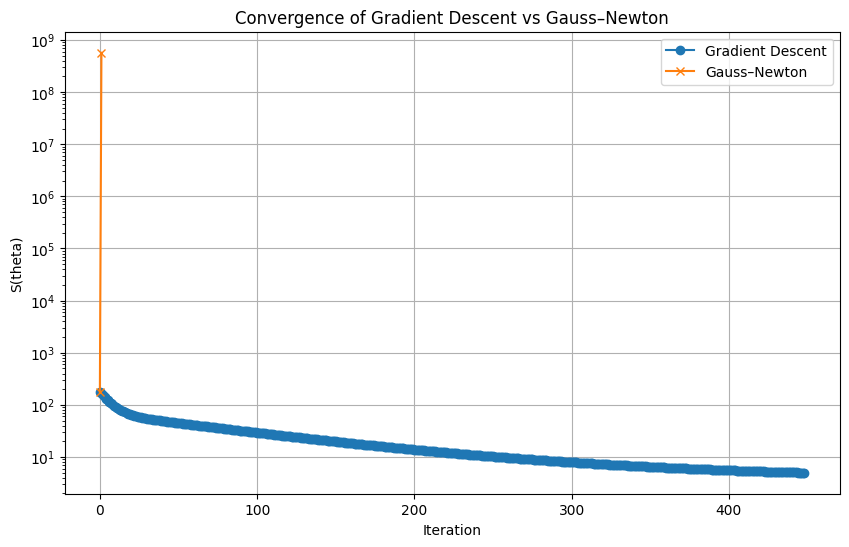

In [37]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(S_hist_gd, label='Gradient Descent', marker='o')
plt.plot(S_hist_gn, label='Gauss–Newton', marker='x')
plt.yscale('log')
plt.xlabel('Iteration')
plt.ylabel('S(theta)')
plt.title('Convergence of Gradient Descent vs Gauss–Newton')
plt.legend()
plt.grid()
plt.show()

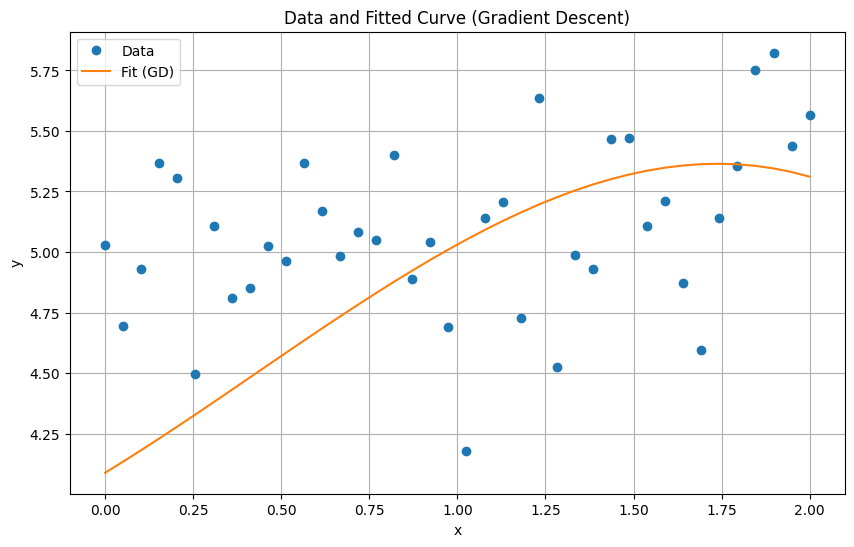

In [41]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)

ax.plot(x, y, 'o', label='Data')

ax.plot(x, f(x, theta_gd), '-', label='Fit (GD)')
# ax.plot(x, f(x, theta_gn), '--', label='Fit (GN)')

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Data and Fitted Curve (Gradient Descent)')
ax.legend()
ax.grid(True)

plt.show()